In [60]:
import pandas as pd
df=pd.read_csv('../../A03-OPIM_Moses_beg24003/california_housing_train.csv')

In [61]:
df.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  ho

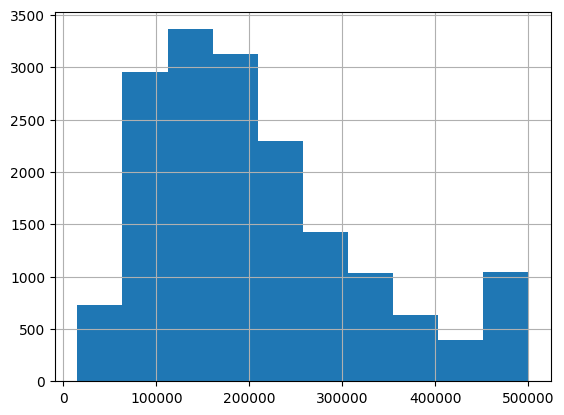

In [62]:
import matplotlib.pyplot as plt

df['median_house_value'].hist()
plt.show()

In [63]:
# create a new target variable for SMOTE
import numpy as np

# nice imbalanced data!
df['median_house_value'] = np.where(df['median_house_value'] < 380000, 1, 0)
df['median_house_value'].value_counts()

median_house_value
1    15304
0     1696
Name: count, dtype: int64

In [85]:
#1. Split data to X and 
X = df.drop('median_house_value', axis=1)
Y = df['median_house_value']
print(X.shape, Y.shape)

(17000, 8) (17000,)


In [86]:
#split data to train and test
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(13600, 8) (3400, 8)
(13600,) (3400,)


In [70]:
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [87]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

In [27]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [88]:
#2. Majority Undersampling
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [89]:
# define oversampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, Y_under = undersample.fit_resample(X, Y)
# summarize class distribution
print(Counter(Y_under))

Counter({0: 1696, 1: 1696})


In [90]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(13600, 8) (3400, 8) (13600,) (3400,)


In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
DTC = DecisionTreeClassifier(min_samples_split=10)

In [92]:
DTC.fit(X_train, Y_train)
train_preds = DTC.predict(X_train)
test_preds = DTC.predict(X_test)

print('Train results: \n')
print(classification_report(Y_train, train_preds))
print('Test results: \n')
print(classification_report(Y_test, test_preds))

Train results: 

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1344
           1       0.99      0.99      0.99     12256

    accuracy                           0.98     13600
   macro avg       0.94      0.95      0.95     13600
weighted avg       0.98      0.98      0.98     13600

Test results: 

              precision    recall  f1-score   support

           0       0.57      0.63      0.60       352
           1       0.96      0.95      0.95      3048

    accuracy                           0.91      3400
   macro avg       0.76      0.79      0.78      3400
weighted avg       0.92      0.91      0.91      3400



In [40]:
# train confusion matrix
confusion_matrix(Y_train, train_preds)

array([[ 1236,   108],
       [  148, 12108]], dtype=int64)

In [41]:
confusion_matrix(Y_test, test_preds)

array([[ 212,  140],
       [ 169, 2879]], dtype=int64)

In [77]:
#Comment: The decision tree shows excellent training performance but noticeably weaker generalization on the test set, particularly for the minority class, indicating overfitting despite undersampling. Although undersampling improved minority-class recall, the model still struggles to reliably distinguish class 0 in unseen data.

In [42]:
#3. Minority Oversampling
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
print(X.shape, y.shape)

(17000, 8) (17000,)


In [43]:
#split data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(13600, 8) (3400, 8)
(13600,) (3400,)


In [44]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

In [45]:

# define oversampling strategy
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({1: 15304, 0: 15304})


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
DTC = DecisionTreeClassifier(min_samples_split=10)

In [47]:
DTC.fit(X_train, y_train)
train_preds_O = DTC.predict(X_train)
test_preds_O = DTC.predict(X_test)

In [48]:
print('Train results: \n')
print(classification_report(y_train, train_preds_O))
print('Test results: \n')
print(classification_report(y_test, test_preds_O))

Train results: 

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1344
           1       0.99      0.99      0.99     12256

    accuracy                           0.98     13600
   macro avg       0.94      0.95      0.95     13600
weighted avg       0.98      0.98      0.98     13600

Test results: 

              precision    recall  f1-score   support

           0       0.57      0.62      0.59       352
           1       0.96      0.95      0.95      3048

    accuracy                           0.91      3400
   macro avg       0.76      0.78      0.77      3400
weighted avg       0.92      0.91      0.91      3400



In [49]:
# train confusion matrix
confusion_matrix(y_train, train_preds_O)

array([[ 1230,   114],
       [  151, 12105]], dtype=int64)

In [50]:
confusion_matrix(y_test, test_preds_O)

array([[ 217,  135],
       [ 164, 2884]], dtype=int64)

In [51]:
# Comment:minority oversampling slightly smooths the decision boundary but does not improve generalization; this is likely due to the fact the model’s performance is constrained by the decision tree structure rather than class imbalance alone.

In [52]:
# 4. SMOTE

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for our nearest neighbor algorithm
from sklearn.neighbors import NearestNeighbors
# random number generator
import random
# counter
from collections import Counter

In [56]:
df=pd.read_csv('../../A03-OPIM_Moses_beg24003/california_housing_train.csv')
df.info()
df.head()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [57]:
# nice imbalanced data!
df['median_house_value'] = np.where(df['median_house_value'] < 380000, 1, 0)
df['median_house_value'].value_counts()

median_house_value
1    15304
0     1696
Name: count, dtype: int64

In [60]:
#Split data to x and y 
x = df.drop('median_house_value', axis=1)
y = df['median_house_value']
print(x.shape, y.shape)

(17000, 8) (17000,)


In [61]:
x = np.array(x)
y = np.array(y)

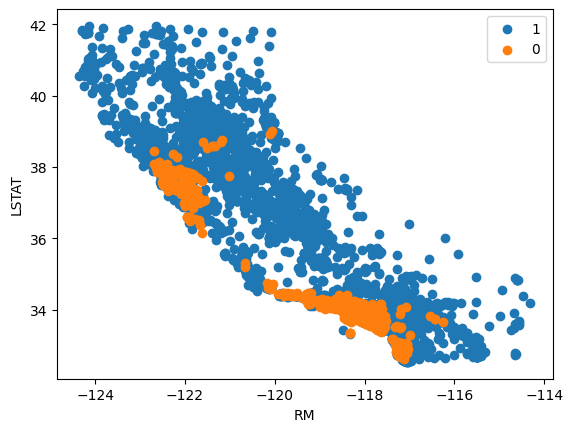

In [62]:
counter = Counter(y)

# scatter plot by class label
for label, _ in counter.items():
 row_ix = np.where(y == label)[0]
 plt.scatter(x[row_ix, 0], x[row_ix, 1], label=str(label))
plt.ylabel('LSTAT')
plt.xlabel('RM')
plt.legend()
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape) # looks good!

(13600, 8) (3400, 8)
(13600,) (3400,)


In [65]:
# train
Counter(y_train)

Counter({1: 12256, 0: 1344})

In [66]:
# test
Counter(y_test)

Counter({1: 3048, 0: 352})

In [67]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE

# transform the dataset
oversample = SMOTE(k_neighbors=9)

x_res, y_res = oversample.fit_resample(x_train, y_train) # notice the use of train NOT test or raw X, y
# summarize the new class distribution
counter = Counter(y_res)
print(counter)

Counter({0: 12256, 1: 12256})


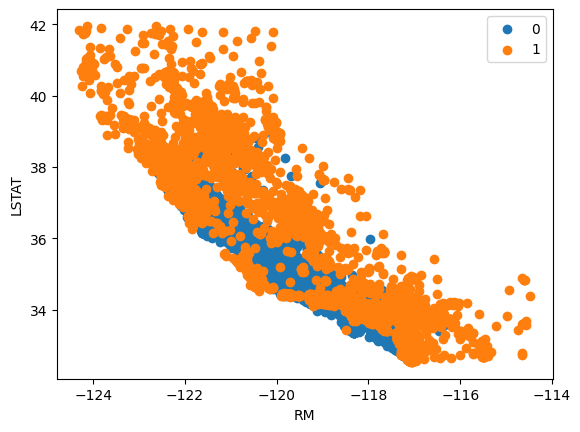

In [68]:
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = np.where(y_res == label)[0]
 plt.scatter(x_res[row_ix, 0], x_res[row_ix, 1], label=str(label))
plt.ylabel('LSTAT')
plt.xlabel('RM')
plt.legend()
plt.show()

In [69]:
#Fit a model on your resampled data on x_train.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
DTC = DecisionTreeClassifier(min_samples_split=10)

In [70]:
# SMOTE data
DTC.fit(x_res, y_res)
train_preds = DTC.predict(x_res)
test_preds = DTC.predict(x_test)
print('Train results: \n')
print(classification_report(y_res, train_preds))
print('Test results: \n')
print(classification_report(y_test, test_preds))

Train results: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     12256
           1       0.99      0.97      0.98     12256

    accuracy                           0.98     24512
   macro avg       0.98      0.98      0.98     24512
weighted avg       0.98      0.98      0.98     24512

Test results: 

              precision    recall  f1-score   support

           0       0.44      0.74      0.55       352
           1       0.97      0.89      0.93      3048

    accuracy                           0.88      3400
   macro avg       0.70      0.82      0.74      3400
weighted avg       0.91      0.88      0.89      3400



In [72]:
confusion_matrix(y_res, train_preds)

array([[12087,   169],
       [  308, 11948]], dtype=int64)

In [74]:
confusion_matrix(y_test, test_preds)

array([[ 262,   90],
       [ 333, 2715]], dtype=int64)

In [75]:
#Comment: Applying SMOTE substantially improved minority-class recall on the test set (0.74 vs 0.62), indicating better sensitivity to class 0, but this comes at the cost of lower precision (0.44) and a drop in overall accuracy.

In [82]:
#5. Comparison of 3 methods
# Comment: No single method is universally best. Overall, undersampling/oversampling are more conservative and stable, while SMOTE is preferable only if only high precision is not the priority.

In [83]:
#6. Reproducibility-run it 30 times or more

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

In [91]:
#Split data to x and y 
x = df.drop('median_house_value', axis=1)
y = df['median_house_value']
print(x.shape, y.shape)

(17000, 8) (17000,)


In [94]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(13600, 8) (3400, 8)
(13600,) (3400,)


In [96]:
foldRange = np.arange(5)
repeatRange = np.arange(30)

resultDF = []

for a in repeatRange:  # 10 repeats
    # shuffle between repetitions so folds change
    Xs, ys = shuffle(X_train, y_train, random_state=a)

    for i in foldRange:  # 5 folds
        # --- Manual fold split (same structure you used) ---
        start = round(i * 0.2 * Xs.shape[0])
        end   = round((i + 1) * 0.2 * Xs.shape[0])

        model_X_test = Xs.iloc[start:end]
        model_y_test = ys.iloc[start:end]

        # training portion = everything not in test fold
        # (keeps your structure; uses isin on all columns)
        model_X_train = Xs[~Xs.isin(model_X_test)].dropna()
        model_y_train = ys.loc[model_X_train.index]

        # --- SMOTE ONLY on the training fold (no leakage) ---
        sm = SMOTE(random_state=i + 100*a)  # changes each fold/repeat
        X_res, y_res = sm.fit_resample(model_X_train, model_y_train)

        # --- Decision Tree model ---
        DT = DecisionTreeClassifier(random_state=i + 100*a)
        DT.fit(X_res, y_res)

        # --- Predict and score on the test fold ---
        test_preds = DT.predict(model_X_test)

        acc  = accuracy_score(model_y_test, test_preds)

        # If your minority/“positive” class is 0, keep pos_label=0.
        # If it's 1, change pos_label=1.
        prec = precision_score(model_y_test, test_preds, pos_label=0, zero_division=0)
        rec  = recall_score(model_y_test, test_preds, pos_label=0, zero_division=0)

        resultDF.append([a, i, acc, prec, rec])


In [100]:
resultDF = pd.DataFrame(resultDF)
resultDF.T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,29.000000,29.000000,29.000000,29.000000,29.000000
1,0.000000,1.000000,2.000000,3.000000,4.000000,0.000000,1.000000,2.000000,3.000000,4.000000,...,0.000000,1.000000,2.000000,3.000000,4.000000,0.000000,1.000000,2.000000,3.000000,4.000000
2,0.898162,0.899632,0.903676,0.889338,0.896691,0.892279,0.891912,0.901103,0.890441,0.894853,...,0.893750,0.900368,0.893750,0.900735,0.895588,0.897794,0.892647,0.899632,0.893015,0.893382
3,0.502660,0.473039,0.534946,0.447837,0.480720,0.466165,0.479012,0.505000,0.459057,0.470130,...,0.475610,0.492611,0.451031,0.506460,0.500000,0.487310,0.444744,0.511111,0.469880,0.484185
4,0.677419,0.768924,0.690972,0.676923,0.703008,0.699248,0.700361,0.739927,0.698113,0.688213,...,0.724907,0.754717,0.697211,0.712727,0.679577,0.716418,0.657371,0.734043,0.733083,0.718412


In [98]:
# what's the mean(MAE)?
theMean = np.mean(pd.DataFrame(resultDF).iloc[:,1])
print(theMean)

2.0


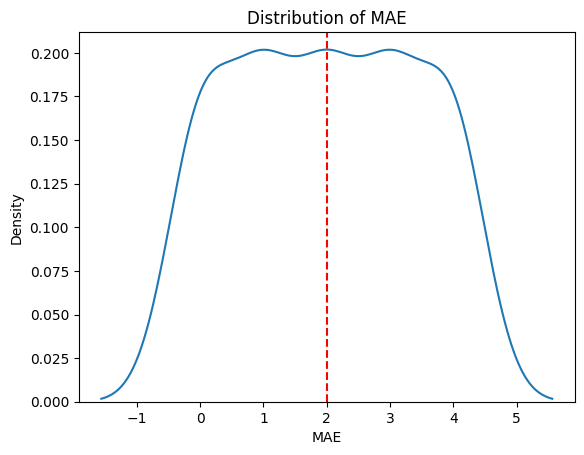

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(resultDF[1])
plt.axvline(theMean, color='red', linestyle="--")
plt.xlabel('MAE')
plt.title('Distribution of MAE')
plt.show()

In [104]:
# Yes—especially for recall.
# Some folds consistently gave higher recall, while others struggle, indicating that certain train–test splits contain more informative minority samples (or cleaner decision boundaries) than others.

In [103]:
#7. Comments on the repeated experiment

# Accuracy is very stable across folds, clustering tightly around ~0.89–0.90. This suggests the model’s overall correctness is robust to how the data are split, and accuracy likely forms a narrow, near–bell-shaped distribution.
# Recall (minority class) shows the largest spread, ranging roughly from the mid-0.44s up to ~0.77. This indicates that some folds capture the minority-class structure much better than others.
# Finally, precision sits between accuracy and recall in terms of variability, showing moderate spread and clear fold-to-fold fluctuations.